### **Chargement du jeu de donnees pretraite depuis le  referentielle google drive**

In [1]:
!pip install -U gdown  # au cas où gdown n'est pas installé
import os

FILE_ID = "1UxMCTBZiQGXIQShuEAdaSKn2Y_hKnDQj"

# Créer un dossier pour le zip
os.makedirs("data", exist_ok=True)

# Télécharger le fichier zip depuis Google Drive
!gdown {FILE_ID} -O data/dataset.zip

# Décompresser le fichier zip
!unzip -q data/dataset.zip -d data/

Downloading...
From (original): https://drive.google.com/uc?id=1UxMCTBZiQGXIQShuEAdaSKn2Y_hKnDQj
From (redirected): https://drive.google.com/uc?id=1UxMCTBZiQGXIQShuEAdaSKn2Y_hKnDQj&confirm=t&uuid=6bfc6714-f446-4641-8848-9d08a5b97cbb
To: /kaggle/working/data/dataset.zip
100%|████████████████████████████████████████| 529M/529M [00:11<00:00, 47.3MB/s]


### **Chargement des donnees d'entrainement**

In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm  # Pour une barre de progression

# 1. Fonction pour charger les images brutes
def load_raw_image(filepath):
    filename = os.path.basename(filepath)  # Exemple: 'bruised_plum_0.png'
    label = os.path.splitext(filename)[0].split('_')[0]  # Enlève l'extension => 'bruised'

    # Charger l'image et la convertir en array numpy
    img = Image.open(filepath).convert('RGB')
    img_array = np.array(img)

    return {'label': label, 'image': img_array}

# 2. Parcourir le dossier et remplir le DataFrame
data = []
# landry237_plum_dataset_split_path contains the downloaded data
train_dir = '/kaggle/working/data/data_split/train' # Using the downloaded data path

for filename in tqdm(os.listdir(train_dir)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        filepath = os.path.join(train_dir, filename)
        data.append(load_raw_image(filepath))

# 3. Créer le DataFrame
df = pd.DataFrame(data)

# Aperçu des données
print(f"Nombre d'images chargées : {len(df)}")
print(df.head())

# Exemple d'accès aux données
print("Shape d'une image :", df.iloc[0]['image'].shape)  # (Hauteur, Largeur, Canaux)

100%|██████████| 9600/9600 [00:11<00:00, 839.88it/s]


Nombre d'images chargées : 9600
        label                                              image
0     spotted  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1      unripe  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2     spotted  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3  unaffected  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4     spotted  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Shape d'une image : (224, 224, 3)


### **Chargement des donnees de teste**

In [3]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm  # Pour une barre de progression

# 1. Fonction pour charger les images brutes
def load_raw_image(filepath):
    filename = os.path.basename(filepath)  # Exemple: 'bruised_plum_0.png'
    label = os.path.splitext(filename)[0].split('_')[0]  # Enlève l'extension => 'bruised'

    # Charger l'image et la convertir en array numpy
    img = Image.open(filepath).convert('RGB')
    img_array = np.array(img)

    return {'classes': label, 'image': img_array}

# 2. Parcourir le dossier et remplir le DataFrame
data = []
test_dir = '/kaggle/working/data/data_split/test'  # Chemin à adapter si besoin

for filename in tqdm(os.listdir(test_dir)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        filepath = os.path.join(test_dir, filename)
        data.append(load_raw_image(filepath))

# 3. Créer le DataFrame
df_test = pd.DataFrame(data)

# Aperçu des données
print(f"Nombre d'images chargées : {len(df_test)}")
print(df_test.head())

# Exemple d'accès aux données
print("Shape d'une image :", df_test.iloc[0]['image'].shape)  # (Hauteur, Largeur, Canaux)


100%|██████████| 2400/2400 [00:02<00:00, 846.94it/s]


Nombre d'images chargées : 2400
      classes                                              image
0  unaffected  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1     spotted  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2     spotted  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3     bruised  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4      unripe  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Shape d'une image : (224, 224, 3)


### **Fonction permettant d'afficher 'n' images prit aleatoirement**

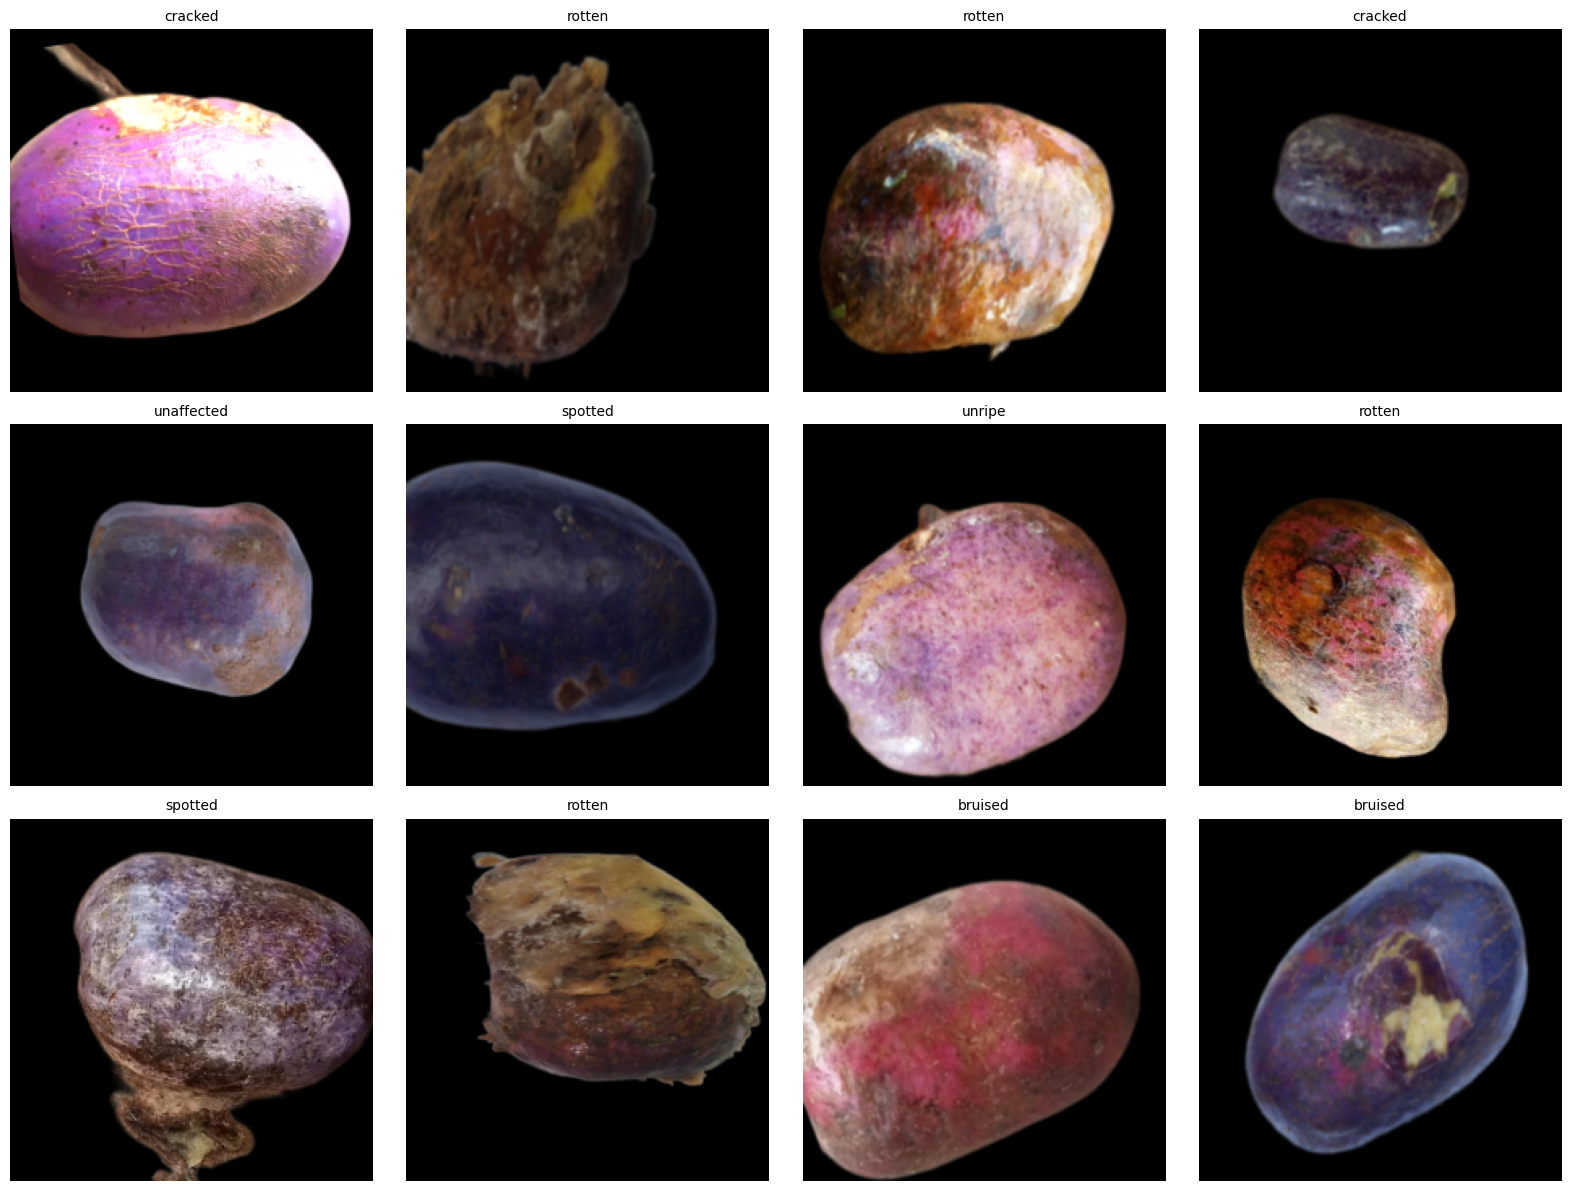

In [4]:
import matplotlib.pyplot as plt
import random
import math

def show_random_images(df, n=8):
    """
    Affiche n images aléatoires du DataFrame avec 4 images maximum par ligne.
    """
    n = min(n, len(df))  # Pour éviter un dépassement
    indices = random.sample(range(len(df)), n)

    # Calcul du nombre de lignes (4 images par ligne max)
    cols = 4
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    axes = axes.flatten()  # Pour pouvoir itérer facilement

    for i in range(rows * cols):
        ax = axes[i]
        if i < n:
            img = df.iloc[indices[i]]['image']
            label = df.iloc[indices[i]]['label']
            ax.imshow(img)
            ax.set_title(label, fontsize=10)
        ax.axis('off')  # Cacher les axes même s'il n'y a pas d'image

    plt.tight_layout()
    plt.show()

show_random_images(df, n=12)


### **Ici on extrait du dataset les lignes appartenant a la categorie defective. c'est a dire les prunes defectueses**

In [5]:
# Liste des mots-clés représentant les défauts(defective)
defective_keywords = ['bruised', 'cracked', 'rotten', 'spotted']

# Garder uniquement les lignes dont le label contient un mot-clé défectueux
df_defective = df[df['label'].apply(lambda x: any(keyword in x.lower() for keyword in defective_keywords))].reset_index(drop=True)

# Affichage rapide
print(f"Nombre d'images défectueuses : {len(df_defective)}\n\n")
print(df_defective.head())


Nombre d'images défectueuses : 6381


     label                                              image
0  spotted  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1  spotted  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2  spotted  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3   rotten  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4  spotted  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...


### **On renomme le dataset en df_label. Pour dire dataset dont les classes sont les 03 labels**

In [6]:
df_label = df

### **Visualisation de 12 images de prunes defectueses**

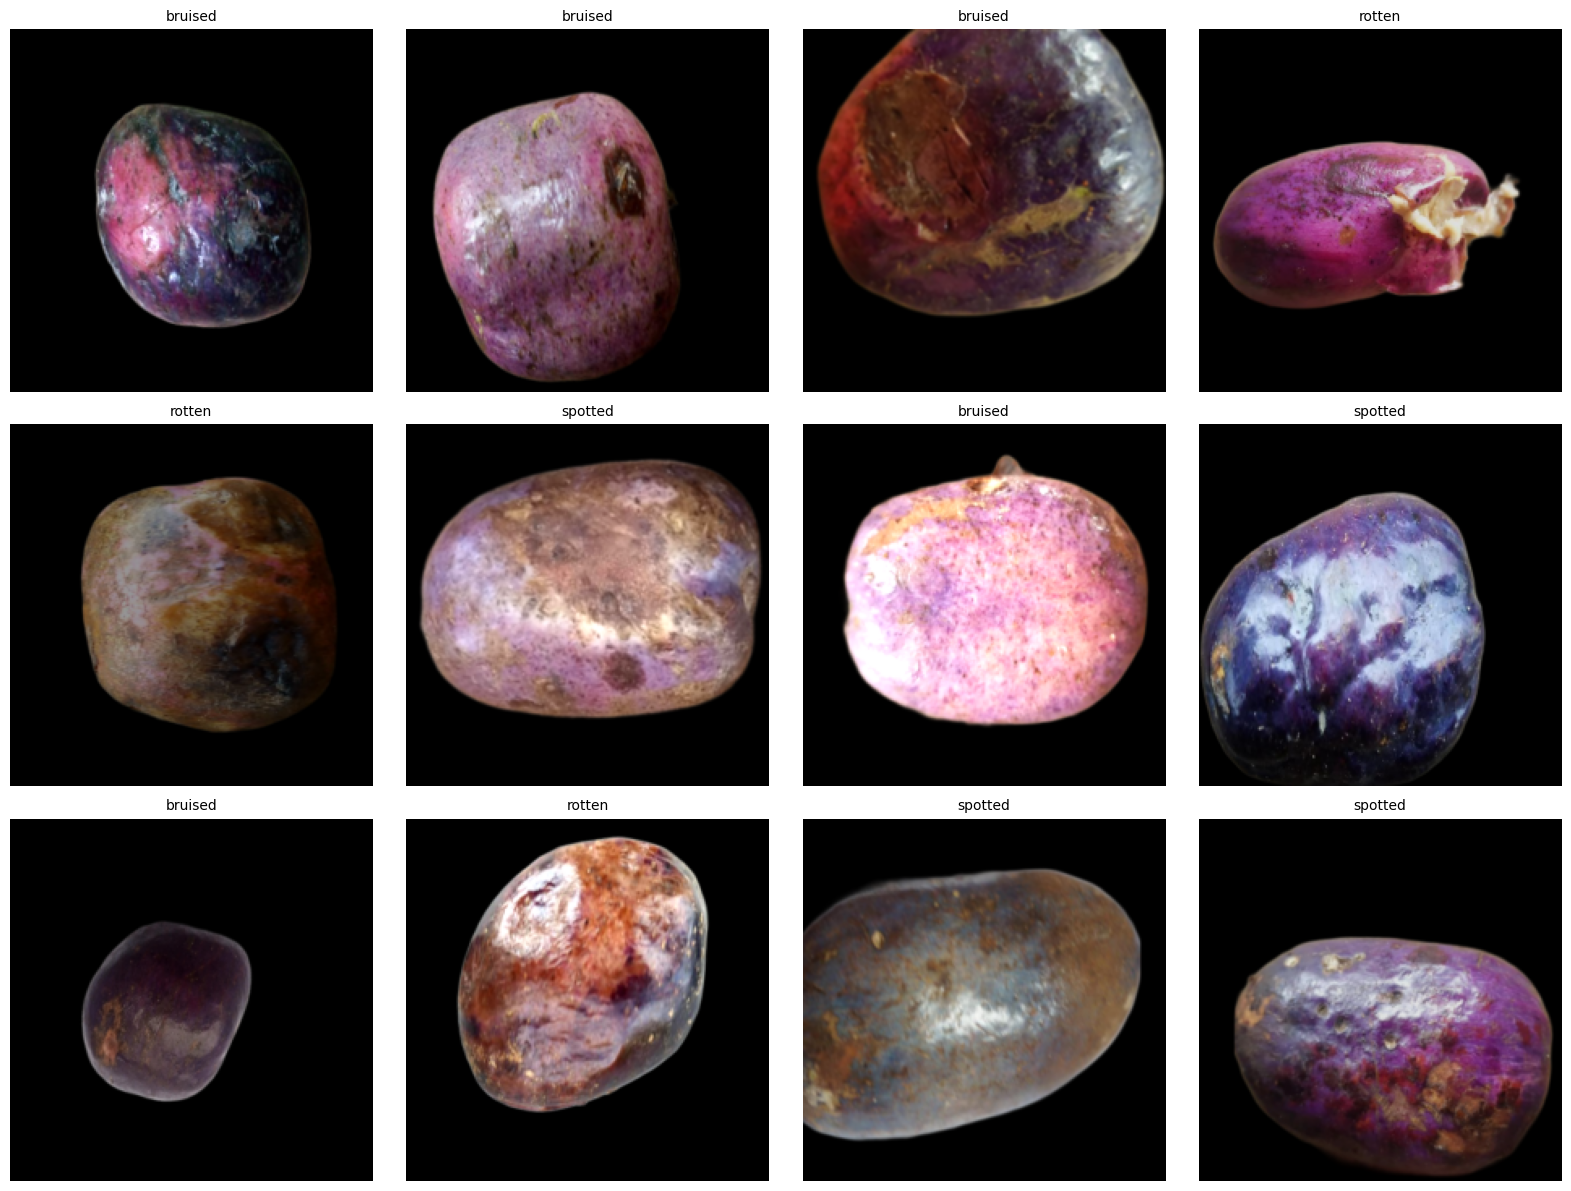

In [7]:
show_random_images(df_defective, n=12)

### **Fonction permettant d'afficher la distribution de chaque classe dans le dataset passe en parametre**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_label_distribution(df, label_column='label'):
    """
    Visualise la distribution des défauts avec un barplot horizontal professionnel
    
    Args:
        df: DataFrame contenant les données
        label_column: Colonne contenant les catégories de défauts
    """
    # Configuration du style
    sns.set_style("whitegrid", {'axes.grid': False})
    plt.figure(figsize=(10, 6))
    
    # Création du plot
    ax = df[label_column].value_counts().plot(
        kind='barh',
        color=sns.color_palette("Dark2"),
        width=0.85,
        edgecolor='black',
        linewidth=0.5
    )
    
    # Personnalisation avancée
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=10)
    
    # Ajout des annotations
    for i, (index, value) in enumerate(df[label_column].value_counts().items()):
        ax.text(
            value + max(df[label_column].value_counts())*0.02,
            i,
            f'{value} ({value/len(df):.1%})',
            va='center',
            fontsize=11,
            color='black'
        )
    
    # Titres et labels
    ax.set_title('Distribution des Catégories de Défauts', pad=20, fontsize=14)
    ax.set_xlabel('Nombre d\'occurrences', labelpad=10, fontsize=12)
    ax.set_ylabel('')
    
    plt.tight_layout()
    plt.show()



### **Graphique representant les distributions du dataset a trois classes**

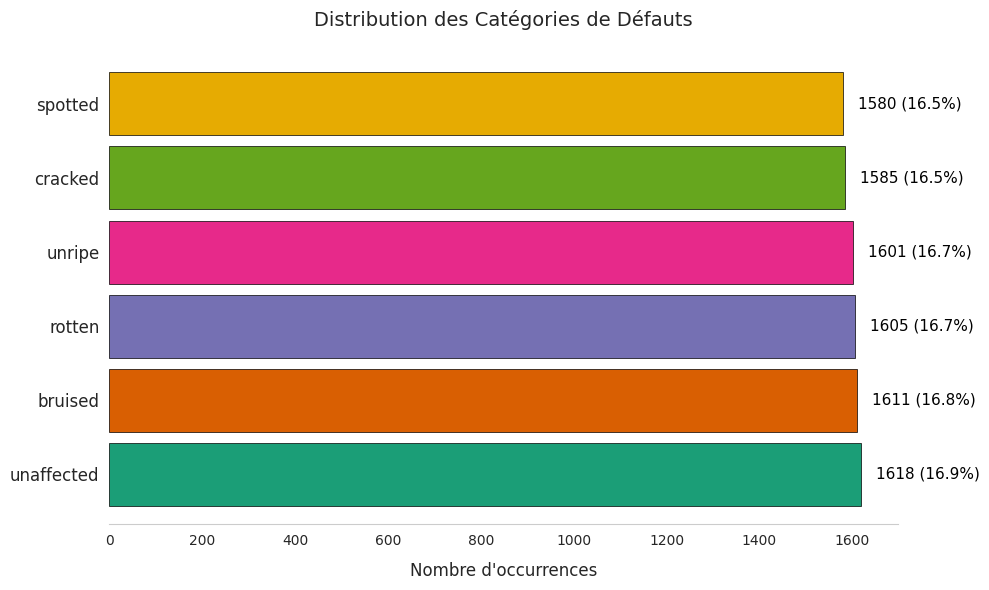

In [9]:



plot_label_distribution(df_label, label_column='label')




### **Graphique representant les distributions du dataset a 04 classes (defective )**

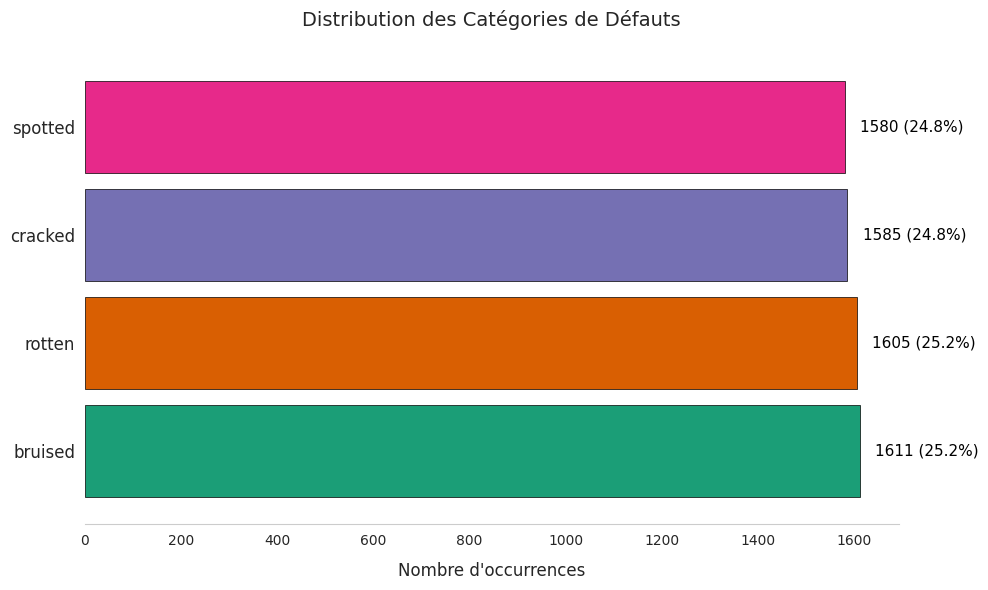

In [10]:
plot_label_distribution(df_defective, label_column='label')


### **Fonction qui affiche les valeurs numeriques des proportions de chaques classes**

In [11]:
import pandas as pd

def show_label_proportions(df, label_column='label'):
    """
    Affiche et retourne les proportions de chaque catégorie dans la colonne spécifiée.
    
    Args:
        df: DataFrame contenant les données.
        label_column: Nom de la colonne contenant les labels.
    
    Returns:
        DataFrame avec les catégories, leur count et leur pourcentage.
    """
    # Compter les occurrences de chaque label
    label_counts = df[label_column].value_counts()
    
    # Calculer les pourcentages
    total = len(df)
    proportions = pd.DataFrame({
        'Label': label_counts.index,
        'Count': label_counts.values,
        'Percentage': (label_counts.values / total) * 100
    })

    # Afficher les résultats
    print("\nLabel\t\tCount\tPercentage")
    for _, row in proportions.iterrows():
        print(f"{row['Label']:<12}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    return proportions


### **Affichage des proportions du dataset a trois classes**

In [12]:
show_label_proportions(df_label, "label")


Label		Count	Percentage
unaffected  	1618	16.9%
bruised     	1611	16.8%
rotten      	1605	16.7%
unripe      	1601	16.7%
cracked     	1585	16.5%
spotted     	1580	16.5%


,Label,Count,Percentage
0,unaffected,1618,16.854167
1,bruised,1611,16.781250
2,rotten,1605,16.718750
3,unripe,1601,16.677083
4,cracked,1585,16.510417
5,spotted,1580,16.458333


### **Ici on parcour le dataframe generale et lorsque on rencontre une image defective ('bruised', 'cracked', 'rotten', 'spotted') on le renomme en defective. Le but est d'avoir un dataset avec trois 03 classes (defective, unripe, unaffected)**

In [13]:
def mark_defective_labels(df):
    """
    Modifie le DataFrame en remplaçant les labels contenant des défauts
    ('bruised', 'cracked', 'rotten', 'spotted') par 'defective'.
    """
    df = df.copy()  # Pour ne pas modifier l'original directement
    defective_keywords = ['bruised', 'cracked', 'rotten', 'spotted']

    df['label'] = df['label'].apply(
        lambda x: 'defective' if any(keyword in x.lower() for keyword in defective_keywords) else x
    )

    return df


### **Reduissons le pourcentage defective pour qu'il ne soit plus trop majoritaire et qui ne biaise pas les donnees**

In [14]:
import pandas as pd
import numpy as np

def reduire_instance(df, nom_instance, pourcentage_reduction):
    """
    Réduit le nombre d'instances d'une catégorie spécifique dans un DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame contenant les données
        nom_instance (str): Nom de la catégorie à réduire (ex: 'bruised')
        pourcentage_reduction (float): Pourcentage de réduction (0-100)
    
    Returns:
        pd.DataFrame: DataFrame avec le nombre d'instances réduit
    """
    # Vérification des entrées
    if pourcentage_reduction < 0 or pourcentage_reduction > 100:
        raise ValueError("Le pourcentage doit être entre 0 et 100")
    
    # Séparation des instances cibles et autres
    mask = df['label'].str.startswith(nom_instance)
    instances_cibles = df[mask]
    autres_instances = df[~mask]
    
    # Calcul du nouveau nombre d'instances
    n_original = len(instances_cibles)
    n_conserver = int(n_original * (100 - pourcentage_reduction) / 100)
    
    # Échantillonnage aléatoire
    instances_reduites = instances_cibles.sample(n=n_conserver, random_state=42)
    
    # Reconstitution du DataFrame
    df_reduit = pd.concat([autres_instances, instances_reduites])
    
    # Information sur la réduction
    print(f"Réduction de {nom_instance}:")
    print(f"- Avant: {n_original} instances")
    print(f"- Après: {n_conserver} instances ({pourcentage_reduction}% de réduction)")
    print(f"- Total dataframe: {len(df_reduit)} instances (initial: {len(df)})")
    
    return df_reduit.reset_index(drop=True)

### **Reduisons 70% des donnees pour que la distribution soit equilibre**

In [15]:
# Réduire de 70% les instances 'bruised'
df_label_reduit = reduire_instance(df_label, 'defective', 70)
show_label_proportions(df_label_reduit, "label")

Réduction de defective:
- Avant: 0 instances
- Après: 0 instances (70% de réduction)
- Total dataframe: 9600 instances (initial: 9600)

Label		Count	Percentage
unaffected  	1618	16.9%
bruised     	1611	16.8%
rotten      	1605	16.7%
unripe      	1601	16.7%
cracked     	1585	16.5%
spotted     	1580	16.5%


,Label,Count,Percentage
0,unaffected,1618,16.854167
1,bruised,1611,16.781250
2,rotten,1605,16.718750
3,unripe,1601,16.677083
4,cracked,1585,16.510417
5,spotted,1580,16.458333


In [16]:
df_label_reduit.head(5)

,label,image
0,spotted,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,unripe,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,spotted,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,unaffected,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,spotted,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


### **Classe de la pipeline d'entrainement**

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
from typing import Dict, Optional
from IPython.display import clear_output, display
import time

# Classe LiveMetricsTracker (inchangée)
class LiveMetricsTracker:
    """Classe pour afficher les métriques en temps réel"""
    def __init__(self):
        self.fig, (self.ax1, self.ax2, self.ax3) = plt.subplots(1, 3, figsize=(18, 5))
        self.fig.canvas.header_visible = False
        plt.ion()
        self.show()
    
    def update(self, history, current_epoch, total_epochs):
        """Met à jour les graphiques"""
        clear_output(wait=True)
        
        self.ax1.clear()
        self.ax1.plot(history['train_loss'], label='Train')
        self.ax1.plot(history['val_loss'], label='Validation')
        self.ax1.set_title(f'Loss (Epoch {current_epoch}/{total_epochs})')
        self.ax1.set_xlabel('Epoch')
        self.ax1.set_ylabel('Loss')
        self.ax1.legend()
        
        self.ax2.clear()
        self.ax2.plot(history['train_acc'], label='Train')
        self.ax2.plot(history['val_acc'], label='Validation')
        self.ax2.set_title(f'Accuracy (Best: {max(history["val_acc"]):.2f}%)')
        self.ax2.set_xlabel('Epoch')
        self.ax2.set_ylabel('Accuracy (%)')
        self.ax2.legend()
        
        self.ax3.clear()
        self.ax3.plot(history['lr_body'], label='Body LR')
        self.ax3.plot(history['lr_head'], label='Head LR')
        self.ax3.set_title('Learning Rates')
        self.ax3.set_xlabel('Epoch')
        self.ax3.set_ylabel('LR')
        self.ax3.set_yscale('log')
        self.ax3.legend()
        
        plt.tight_layout()
        self.show()
        time.sleep(0.1)
    
    def show(self):
        """Affiche le graphique"""
        display(self.fig)
        plt.close()

# Classe PlumImageDataset (inchangée)
class PlumImageDataset(Dataset):
    """Dataset personnalisé pour les DataFrames de prunes"""
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.classes = sorted(df['classes'].unique())
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_array = self.df.iloc[idx]['image']
        label = self.df.iloc[idx]['classes']
        
        img = Image.fromarray(img_array.astype('uint8'))
        
        if self.transform:
            img = self.transform(img)
            
        return img, self.class_to_idx[label]

# Classe AdvancedPlumTrainer (modifiée pour EfficientNetV2-S)
class AdvancedPlumTrainer:
    def __init__(self, hyperparams: Dict, train_df: pd.DataFrame, model_name: str = 'efficientnet_v2_s', val_split: float = 0.2, finale_modele_name="best_modele"):
        self.hp = hyperparams
        self.train_df = train_df
        self.model_name = model_name
        self.val_split = val_split
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.metrics_tracker = LiveMetricsTracker()
        self.finale_modele_name = finale_modele_name
        
        # Division des données en train et validation
        train_idx, val_idx = train_test_split(
            range(len(train_df)),
            test_size=self.val_split,
            stratify=train_df['classes'],
            random_state=42
        )
        train_subset = train_df.iloc[train_idx].reset_index(drop=True)
        val_subset = train_df.iloc[val_idx].reset_index(drop=True)
        
        # Initialisation des datasets et loaders
        self.train_dataset = PlumImageDataset(train_subset, self.get_train_transform())
        self.val_dataset = PlumImageDataset(val_subset, self.get_test_transform())
        
        self.train_loader = DataLoader(self.train_dataset, 
                                     batch_size=self.hp['batch_size'], 
                                     shuffle=True,
                                     num_workers=2)
        self.val_loader = DataLoader(self.val_dataset, 
                                   batch_size=self.hp['batch_size'],
                                   num_workers=2)
        
        # Initialisation du modèle
        self.initialize_model()
        
        # Initialisation de l'optimiseur et du scheduler
        self.initialize_optimizer()
        self.criterion = nn.CrossEntropyLoss()
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, 
            'min', 
            patience=self.hp['scheduler_patience'], 
            factor=self.hp['scheduler_factor']
        )
    
    def get_train_transform(self):
        return transforms.Compose([
            transforms.Resize((self.hp['resize_size'], self.hp['resize_size'])),
            transforms.RandomResizedCrop(self.hp['crop_size']),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    
    def get_test_transform(self):
        return transforms.Compose([
            transforms.Resize((self.hp['resize_size'], self.hp['resize_size'])),
            transforms.CenterCrop(self.hp['crop_size']),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    
    def initialize_model(self):
        """Initialise le modèle avec les hyperparamètres"""
        model_fn = getattr(models, self.model_name)
        self.model = model_fn(weights='IMAGENET1K_V1')  # Charger les poids pré-entraînés
        
        # Geler toutes les couches initialement
        for param in self.model.parameters():
            param.requires_grad = False
        
        # Modifier la couche classifier pour EfficientNetV2
        in_features = self.model.classifier[-1].in_features
        num_classes = len(self.train_dataset.classes)
        self.model.classifier[-1] = nn.Linear(in_features, num_classes)
        # Activer requires_grad pour la nouvelle couche
        for param in self.model.classifier[-1].parameters():
            param.requires_grad = True
        
        self.model = self.model.to(self.device)
    
    def unfreeze_layers(self):
        """Dégèle un pourcentage des couches du modèle"""
        all_params = list(self.model.parameters())
        num_params = len(all_params)
        num_to_unfreeze = int(self.hp['unfreeze_ratio'] * num_params)
        
        # Dégeler les dernières couches (excluant le classifier)
        for param in all_params[-num_to_unfreeze:]:
            param.requires_grad = True
        
        # Mettre à jour l'optimiseur pour inclure les nouveaux paramètres dégélés
        self.initialize_optimizer()
    
    def initialize_optimizer(self):
        """Initialise l'optimiseur avec deux groupes de paramètres (body et head)"""
        # Paramètres de la tête (classifier)
        head_params = list(self.model.classifier[-1].parameters())
        # Paramètres du corps (tous sauf le classifier)
        body_params = [p for p in self.model.parameters() if id(p) not in [id(hp) for hp in head_params] and p.requires_grad]
        
        if self.hp['optimizer'].lower() == 'adamw':
            self.optimizer = optim.AdamW([
                {'params': body_params, 'lr': self.hp['lr_body'], 'weight_decay': self.hp['wd_body']},
                {'params': head_params, 'lr': self.hp['lr_head'], 'weight_decay': self.hp['wd_head']}
            ])
        else:
            self.optimizer = optim.SGD([
                {'params': body_params, 'lr': self.hp['lr_body'], 'weight_decay': self.hp['wd_body']},
                {'params': head_params, 'lr': self.hp['lr_head'], 'weight_decay': self.hp['wd_head']}
            ], momentum=self.hp['momentum'])
    
    def train(self) -> nn.Module:
        """Entraîne le modèle avec visualisation en temps réel"""
        self.history = {
            'train_loss': [], 'train_acc': [],
            'val_loss': [], 'val_acc': [],
            'lr_body': [], 'lr_head': []
        }
        
        best_val_acc = 0.0
        
        for epoch in range(self.hp['num_epochs']):
            # Dégeler les couches après freeze_epochs
            if epoch == self.hp['freeze_epochs']:
                self.unfreeze_layers()
            
            # Phase d'entraînement
            self.model.train()
            running_loss = 0.0
            correct = 0
            total = 0
            
            for inputs, labels in tqdm(self.train_loader, desc=f'Epoch {epoch+1}'):
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            
            train_loss = running_loss / total
            train_acc = 100. * correct / total
            
            # Phase de validation
            val_loss, val_acc = self.evaluate(self.val_loader)
            self.scheduler.step(val_loss)
            
            # Mise à jour des métriques
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['lr_body'].append(self.optimizer.param_groups[0]['lr'])
            self.history['lr_head'].append(self.optimizer.param_groups[1]['lr'])
            
            # Affichage console
            print(f'\nEpoch {epoch+1:03d}/{self.hp["num_epochs"]}')
            print(f'{"Train":<10} Loss: {train_loss:.4f} | Acc: {train_acc:.2f}%')
            print(f'{"Val":<10} Loss: {val_loss:.4f} | Acc: {val_acc:.2f}%')
            print(f'{"LR":<10} Body: {self.history["lr_body"][-1]:.2e} | Head: {self.history["lr_head"][-1]:.2e}')
            
            # Mise à jour des graphiques
            self.metrics_tracker.update(self.history, epoch+1, self.hp['num_epochs'])
            
            # Sauvegarde du meilleur modèle
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                self.save_checkpoint(epoch, val_acc)
                print(f'New best model saved (Acc: {val_acc:.2f}%)')
        
        # Charger le meilleur modèle avant de le retourner
        checkpoint = torch.load(self.finale_modele_name, weights_only=True)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        
        return self.model
    
    def evaluate(self, loader):
        """Évaluation du modèle"""
        self.model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                
                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        return running_loss / total, 100. * correct / total
    
    def save_checkpoint(self, epoch, val_acc):
        """Sauvegarde le modèle"""
        torch.save({
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'val_acc': val_acc,
        }, self.finale_modele_name+".th")

    

    def load_checkpoint(self, model, optimizer, device='cpu'):
        """
        Charge un checkpoint complet (modèle, optimiseur, epoch, val_acc) depuis un fichier.
        
        Args:
            model (torch.nn.Module): Le modèle PyTorch à mettre à jour.
            optimizer (torch.optim.Optimizer): L'optimiseur à restaurer.
            device (str): 'cpu' ou 'cuda' selon l'utilisation.
        
        Returns:
            tuple: (model, optimizer, epoch, val_acc)
        """
        checkpoint = torch.load(self.finale_modele_name, map_location=device)
        
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        val_acc = checkpoint['val_acc']
        
        print(f"✅ Checkpoint chargé depuis '{self.finale_modele_name}' (epoch {epoch}, val_acc {val_acc:.4f})")
        return model, optimizer, epoch, val_acc


    
    def plot_results(self):
        """Visualisation des résultats finaux"""
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.plot(self.history['train_loss'], label='Train')
        plt.plot(self.history['val_loss'], label='Validation')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 3, 2)
        plt.plot(self.history['train_acc'], label='Train')
        plt.plot(self.history['val_acc'], label='Validation')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        
        plt.subplot(1, 3, 3)
        plt.plot(self.history['lr_body'], label='Body LR')
        plt.plot(self.history['lr_head'], label='Head LR')
        plt.title('Learning Rate Evolution')
        plt.xlabel('Epoch')
        plt.ylabel('LR')
        plt.yscale('log')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

    def evaluate_test_data(self, test_df, model=None):
        """
        Évalue les performances du modèle sur les données de test
        
        Args:
            test_df (pd.DataFrame): DataFrame contenant les images de test et leurs classes
            model (nn.Module, optional): Modèle à évaluer. Si None, utilise self.model
        
        Returns:
            dict: Dictionnaire contenant les métriques d'évaluation (accuracy, loss, confusion matrix, etc.)
        """
        if model is None:
            model = self.model
        
        # Créer le dataset et dataloader de test
        test_dataset = PlumImageDataset(test_df, self.get_test_transform())
        test_loader = DataLoader(
            test_dataset, 
            batch_size=self.hp['batch_size'],
            num_workers=2
        )
        
        # Mettre le modèle en mode évaluation
        model.eval()
        
        # Initialiser les variables pour le suivi
        test_loss = 0.0
        correct = 0
        total = 0
        
        # Préparer les tableaux pour la matrice de confusion
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for inputs, labels in tqdm(test_loader, desc="Évaluation sur test"):
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                
                # Faire la prédiction
                outputs = model(inputs)
                loss = self.criterion(outputs, labels)
                
                # Calculer les métriques
                test_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                # Stocker pour la matrice de confusion
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        # Calculer les métriques finales
        accuracy = 100. * correct / total
        avg_loss = test_loss / total
        
        # Calculer la matrice de confusion
        from sklearn.metrics import confusion_matrix, classification_report
        conf_matrix = confusion_matrix(all_labels, all_preds)
        class_report = classification_report(all_labels, all_preds, 
                                             target_names=test_dataset.classes,
                                             output_dict=True)
        
        # Afficher les résultats
        print(f"\nRésultats sur le jeu de test:")
        print(f"Accuracy: {accuracy:.2f}%")
        print(f"Loss: {avg_loss:.4f}")
        
        # Visualiser la matrice de confusion
        plt.figure(figsize=(10, 8))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Matrice de confusion')
        plt.colorbar()
        
        # Étiquettes pour la matrice de confusion
        tick_marks = np.arange(len(test_dataset.classes))
        plt.xticks(tick_marks, test_dataset.classes, rotation=45)
        plt.yticks(tick_marks, test_dataset.classes)
        
        # Afficher les valeurs dans la matrice
        thresh = conf_matrix.max() / 2.
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                plt.text(j, i, format(conf_matrix[i, j], 'd'),
                         ha="center", va="center",
                         color="white" if conf_matrix[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('Vraie classe')
        plt.xlabel('Classe prédite')
        plt.show()
        
        # Créer et retourner un dictionnaire avec toutes les métriques
        results = {
            'accuracy': accuracy,
            'loss': avg_loss,
            'confusion_matrix': conf_matrix,
            'classification_report': class_report,
            'predictions': all_preds,
            'true_labels': all_labels
        }
        
        return results



In [18]:
train_data_03_classes = df_label_reduit
train_data_03_classes = train_data_03_classes.rename(columns={'label': 'classes'})

train_data_04_classes_defective = df_defective
train_data_04_classes_defective = train_data_04_classes_defective.rename(columns={'label': 'classes'})

test_data = df_test


### **Definition des hyper parametres et execution du modele1**

### **Definition des hyper parametres et execution du modele1**

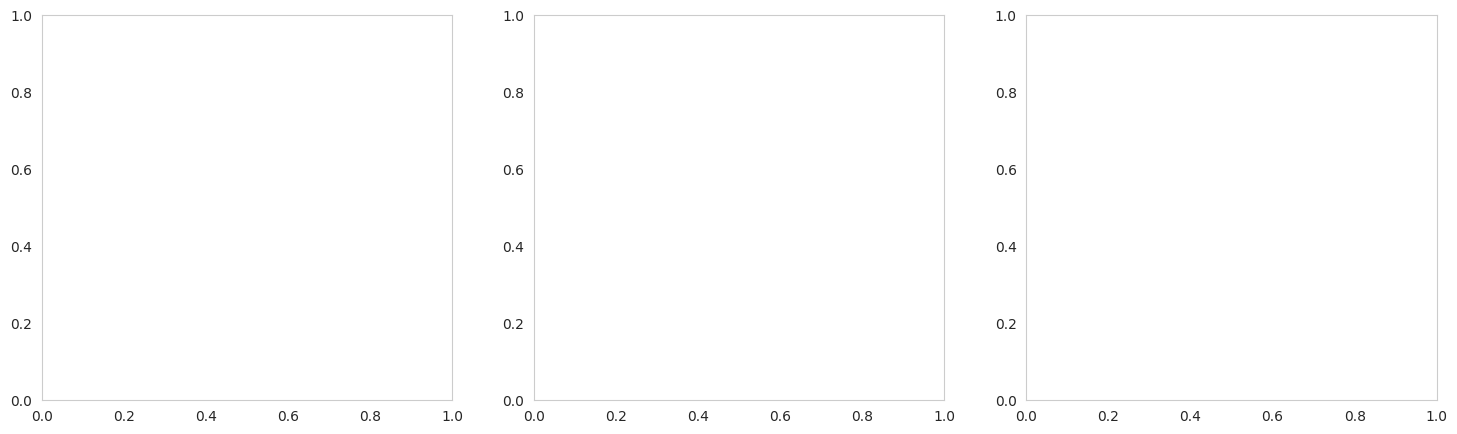

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 177MB/s]
Epoch 1: 100%|██████████| 120/120 [00:34<00:00,  3.51it/s]



Epoch 001/60
Train      Loss: 1.7368 | Acc: 26.21%
Val        Loss: 1.7839 | Acc: 19.58%
LR         Body: 4.88e-05 | Head: 1.95e-04
New best model saved (Acc: 19.58%)


Epoch 2: 100%|██████████| 120/120 [00:33<00:00,  3.58it/s]



Epoch 002/60
Train      Loss: 1.6223 | Acc: 37.01%
Val        Loss: 1.7757 | Acc: 21.09%
LR         Body: 4.52e-05 | Head: 1.81e-04
New best model saved (Acc: 21.09%)


Epoch 3: 100%|██████████| 120/120 [00:33<00:00,  3.60it/s]



Epoch 003/60
Train      Loss: 1.5606 | Acc: 39.60%
Val        Loss: 1.7790 | Acc: 20.89%
LR         Body: 3.97e-05 | Head: 1.59e-04


Epoch 4: 100%|██████████| 120/120 [00:35<00:00,  3.35it/s]



Epoch 004/60
Train      Loss: 1.3251 | Acc: 49.22%
Val        Loss: 1.8549 | Acc: 20.52%
LR         Body: 5.00e-05 | Head: 2.00e-04


Epoch 5: 100%|██████████| 120/120 [00:35<00:00,  3.38it/s]



Epoch 005/60
Train      Loss: 1.1015 | Acc: 57.75%
Val        Loss: 1.9497 | Acc: 19.64%
LR         Body: 5.00e-05 | Head: 2.00e-04


Epoch 6:  33%|███▎      | 40/120 [00:12<00:29,  2.70it/s]

In [ ]:
 HYPERPARAMS = {
        'model_name': 'efficientnet_v2_s',
        'batch_size': 64,  # Augmenté pour plus d'efficacité avec un modèle léger
        'num_epochs': 60,  # Réduit car EfficientNet converge plus vite
        'freeze_epochs': 3,  # Moins d'époques gelées
        'unfreeze_ratio': 0.3,  # Moins de couches dégélées pour réduire le calcul
        'optimizer': 'adamw',
        'lr_body': 5e-5,  # Taux d'apprentissage légèrement plus élevé
        'lr_head': 2e-4,
        'wd_body': 0.01,
        'wd_head': 0.001,
        'momentum': 0.9,
        'weight_decay': 1e-4,
        'resize_size': 256,
        'crop_size': 224,
        'scheduler_patience': 2,  # Patience réduite pour ajustement rapide
        'scheduler_factor': 0.1
    }
    
trainer = AdvancedPlumTrainer(HYPERPARAMS, train_data_03_classes, model_name='efficientnet_v2_s', finale_modele_name="best_o_modele1")
model1 = trainer.train()
trainer.plot_results()

In [ ]:
 HYPERPARAMS = {
        'model_name': 'efficientnet_v2_s',
        'batch_size': 64,  # Augmenté pour plus d'efficacité avec un modèle léger
        'num_epochs': 60,  # Réduit car EfficientNet converge plus vite
        'freeze_epochs': 3,  # Moins d'époques gelées
        'unfreeze_ratio': 0.3,  # Moins de couches dégélées pour réduire le calcul
        'optimizer': 'adamw',
        'lr_body': 5e-5,  # Taux d'apprentissage légèrement plus élevé
        'lr_head': 2e-4,
        'wd_body': 0.01,
        'wd_head': 0.001,
        'momentum': 0.9,
        'weight_decay': 1e-4,
        'resize_size': 256,
        'crop_size': 224,
        'scheduler_patience': 2,  # Patience réduite pour ajustement rapide
        'scheduler_factor': 0.1
    }
    
trainer2 = AdvancedPlumTrainer(HYPERPARAMS, train_data_04_classes_defective, model_name='efficientnet_v2_s', finale_modele_name="best_plum_modele2")
model2 = trainer2.train()
trainer2.plot_results()

In [ ]:
trainer2.plot_results()

### **Sauvegarde des modeles**

In [ ]:
import torch

# Sauvegarde complète (poids + métriques + infos d'entraînement)
torch.save({
    # 'epoch': epoch,
    'model_state_dict': model1.state_dict(),  # Poids du modèle
    # 'optimizer_state_dict': optimizer.state_dict(),
    # 'loss': train_loss,
    # 'accuracy': val_accuracy,
    # 'best_accuracy': best_accuracy,
}, 'resnet_model1.pth')  # Extension .pth ou .pt

In [ ]:
import torch

# Sauvegarde complète (poids + métriques + infos d'entraînement)
torch.save({
    # 'epoch': epoch,
    'model_state_dict': model2.state_dict(),  # Poids du modèle
    # 'optimizer_state_dict': optimizer.state_dict(),
    # 'loss': train_loss,
    # 'accuracy': val_accuracy,
    # 'best_accuracy': best_accuracy,
}, 'resnet_model2.pth')  # Extension .pth ou .pt

### **Fusion des deux modeles en un seule modele**

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

class CombinedModel(nn.Module):
    def __init__(self, model1, model2, test_transform=None):
        super().__init__()
        self.model1 = model1
        self.model2 = model2
        self.test_transform = test_transform
        
        # Mapping index -> label pour clarté
        self.model1_classes = ['defective', 'unaffected', 'unripe']
        self.model2_classes = ['bruised', 'cracked', 'rotten', 'spotted']
        self.final_classes = ['bruised', 'cracked', 'rotten', 'spotted', 'unaffected', 'unripe']
        
        # Mettre les modèles en mode évaluation
        self.model1.eval()
        self.model2.eval()
    
    def preprocess_image(self, image):
        """Prétraite une image avant de la passer aux modèles"""
        # Si c'est un tableau numpy, convertir en PIL Image
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image.astype('uint8'))
        
        # Appliquer les transformations si disponibles
        if self.test_transform:
            return self.test_transform(image).unsqueeze(0)  # Ajouter dimension batch
        else:
            # Transformations par défaut si aucune n'est fournie
            transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
            return transform(image).unsqueeze(0)
    
    def forward(self, x):
        """
        Forward pass du modèle combiné
        
        Args:
            x: Peut être une image PIL, un tableau numpy, ou un tensor PyTorch
            
        Returns:
            dict: Dictionnaire contenant les prédictions et probabilités
        """
        # Vérifier si x est déjà un tensor PyTorch
        if not isinstance(x, torch.Tensor):
            x = self.preprocess_image(x)
        
        # S'assurer que le tensor est sur le bon device
        device = next(self.model1.parameters()).device
        x = x.to(device)
        
        # Passage à travers le modèle 1 pour la classification initiale
        with torch.no_grad():
            out1 = self.model1(x)
            probas1 = torch.softmax(out1, dim=1)
            pred1 = torch.argmax(probas1, dim=1)
            
            batch_size = x.size(0)
            final_preds = []
            final_probas = []
            
            for i in range(batch_size):
                # Prédiction du modèle 1 pour cette image
                class1 = self.model1_classes[pred1[i]]
                
                if class1 == 'defective':
                    # Si défectueux, utiliser le modèle 2 pour déterminer le type de défaut
                    out2 = self.model2(x[i].unsqueeze(0))
                    probas2 = torch.softmax(out2, dim=1)
                    pred2 = torch.argmax(probas2, dim=1).item()
                    
                    # Classe finale et probabilité
                    final_class = self.model2_classes[pred2]
                    final_proba = probas2[0, pred2].item() * probas1[i, pred1[i]].item()  # Probabilité conjointe
                else:
                    # Si non défectueux ou non mûr, utiliser la classification du modèle 1
                    final_class = class1
                    final_proba = probas1[i, pred1[i]].item()
                
                # Convertir la classe en index dans final_classes
                final_idx = self.final_classes.index(final_class)
                
                final_preds.append(final_idx)
                final_probas.append(final_proba)
            
            # Convertir les listes en tensors
            final_preds = torch.tensor(final_preds, device=device)
            final_probas = torch.tensor(final_probas, device=device)
            
            return {
                'pred_idx': final_preds,                   # Indices des classes prédites
                'pred_class': [self.final_classes[idx] for idx in final_preds],  # Noms des classes prédites
                'probability': final_probas               # Probabilités des prédictions
            }







### **Fonction pour evaluer notre modele generale sur les donnees de teste**

In [ ]:
def evaluate_combined_model(combined_model, test_df, test_transform=None, device='cuda'):
    """
    Évalue le modèle combiné sur un jeu de données de test
    
    Args:
        combined_model: Le modèle combiné
        test_df: DataFrame contenant les images et classes de test
        test_transform: Transformations à appliquer aux images (optionnel)
        device: Périphérique pour l'inférence ('cuda' ou 'cpu')
        
    Returns:
        dict: Dictionnaire contenant les résultats d'évaluation
    """
    # Vérifier si CUDA est disponible et respecter le choix de device
    if device == 'cuda' and not torch.cuda.is_available():
        print("CUDA non disponible, utilisation du CPU à la place")
        device = 'cpu'
    
    # S'assurer que le modèle est sur le bon device
    combined_model = combined_model.to(device)
    
    # Définir les transformations si non fournies
    if test_transform is None and combined_model.test_transform is None:
        test_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        combined_model.test_transform = test_transform
    
    # Initialiser les listes pour stocker les résultats
    y_true = []
    y_pred = []
    y_proba = []
    
    # Parcourir le DataFrame de test
    for _, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Évaluation"):
        # Obtenir l'image et la classe réelle
        image = row['image']
        true_label = row['classes']
        
        # Obtenir l'index de la classe réelle
        if true_label in combined_model.final_classes:
            true_idx = combined_model.final_classes.index(true_label)
        else:
            print(f"Attention: classe '{true_label}' non trouvée dans final_classes. Vérifiez vos données.")
            continue
        
        # Faire une prédiction avec le modèle combiné
        with torch.no_grad():
            result = combined_model(image)
        
        # Ajouter les résultats aux listes
        y_true.append(true_idx)
        y_pred.append(result['pred_idx'].item())
        y_proba.append(result['probability'].item())
    
    # Convertir les listes en tableaux numpy pour l'analyse
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_proba = np.array(y_proba)
    
    # Convertir les indices en noms de classe
    class_names = [combined_model.final_classes[idx] for idx in range(len(combined_model.final_classes))]
    y_true_names = [combined_model.final_classes[idx] for idx in y_true]
    y_pred_names = [combined_model.final_classes[idx] for idx in y_pred]
    
    # Calculer les métriques
    print("\nRésultats d'évaluation:")
    print(f"Accuracy: {100 * np.mean(y_true == y_pred):.2f}%")
    
    # Rapport de classification
    print("\nClassification Report:")
    cl_report = classification_report(y_true, y_pred, 
                                      target_names=class_names,
                                      labels=range(len(class_names)),
                                      output_dict=True)
    cl_report_df = pd.DataFrame(cl_report).transpose()
    print(cl_report_df)
    
    # Matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
    conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
    print("\nConfusion Matrix:")
    print(conf_df)
    
    # Visualiser la matrice de confusion
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matrice de confusion')
    plt.colorbar()
    
    # Étiquettes pour les axes
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Afficher les valeurs dans la matrice
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if conf_matrix[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.show()
    
    # Retourner un dictionnaire avec tous les résultats
    return {
        'y_true': y_true,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'y_true_names': y_true_names,
        'y_pred_names': y_pred_names,
        'class_names': class_names,
        'accuracy': np.mean(y_true == y_pred),
        'classification_report': cl_report,
        'confusion_matrix': conf_matrix
    }

In [ ]:

combined = CombinedModel(model1, model2)

# Définir les transformations pour le test
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Évaluer le modèle combiné
results = evaluate_combined_model(combined, test_df, test_transform, device='cuda')

In [ ]:
results = evaluate_combined_model(combined, test_df, test_transform, device='cuda')

In [ ]:
print(f"Accuracy: {results['accuracy']:.4f}")

# Examiner les résultats par classe
for class_name in results['class_names']:
    idx = results['class_names'].index(class_name)
    correct = np.sum((results['y_true'] == idx) & (results['y_pred'] == idx))
    total = np.sum(results['y_true'] == idx)
    print(f"{class_name}: {correct}/{total} = {correct/total:.2f}")

In [ ]:
# import os

# # Nom du fichier à supprimer (remplace par le tien)
# filename = '/kaggle/working/best_modele1.pth'  # Exemple : 'result.csv'

# # Chemin complet vers le fichier dans le dossier output
# filepath = os.path.join('/kaggle/working/', filename)

# # Suppression du fichier si il existe
# if os.path.exists(filepath):
#     os.remove(filepath)
#     print(f"✅ Fichier supprimé : {filepath}")
# else:
#     print(f"❌ Fichier non trouvé : {filepath}")
